## importing libraries

In [1]:
import re
import pickle
import scipy.stats as stats
import pandas as pd
import numpy as np
from tqdm import tqdm
from getDialect import detectDialect
import matplotlib.pyplot as plt
from itertools import combinations
from qna_simulation import answer_extractor
from qna_simulation import run_simulation
from utils import extract_model_accuracy
from utils import build_politeness_classifier
from utils import predict_politeness
from utils import get_readability_score
from utils import categorize_score
from utils import calculate_entropy
from utils import create_readability_plot

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 96.7 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


[nltk_data] Downloading package cmudict to /home/uar6nw/nltk_data...
[nltk_data]   Package cmudict is already up-to-date!
[nltk_data] Downloading package wordnet to /home/uar6nw/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## Q&A simulation (one question per subject from MMLU)
#### This might take 3-5 minutes

In [ ]:
# ## loading dataset names from pickle file
# dataset_name = "bigbench"

# if dataset_name == 'bigbench':
#     category_names = ['navigate', 'tracking_shuffled_objects_three_objects','temporal_sequences', 'date_understanding', 'penguins_in_a_table','causal_judgement']
# else:
#     with open("dataset_name.pkl", "rb") as f:
#         category_names = pickle.load(f)



# '''
# important note:
# parameter "aave" = True means you want to change the whole question prompt to AAVE 
# However, the "aave_instruct" = True just means you only want to change the instruction part of the question prompt to AAVE, 
# the acutal question remains SAE. "aave" and "aave_instruct" can not both be True.
# '''

# df_regular = run_simulation(dataset_name = dataset_name, category_names =category_names,   model_name = "gpt-3.5", aave= True, n_run = 1, aave_instruct = False, converter_type = "both")

# df_regular

## loading the Q&A simulation dataset from 7 different models

In [2]:

gpt3_path = "mmlu_dataset/gpt3/"
gpt4_path = "mmlu_dataset/gpt4/"
llama31_path = "mmlu_dataset/llama3.1/"
qwen_path = "mmlu_dataset/qwen2.5/"
llama32_path = "mmlu_dataset/llama3.2/"
gemma_path = "mmlu_dataset/gemma2/"
mistral_path = "mmlu_dataset/mistral/"

bigbench_gpt3_path = "bigbench_dataset/gpt-3.5/"
bigbench_gpt4_path = "bigbench_dataset/gpt-4/"
bigbench_llama31_path = "bigbench_dataset/llama3.1/"
bigbench_qwen_path = "bigbench_dataset/qwen2.5/"
bigbench_llama32_path = "bigbench_dataset/llama3.2/"
bigbench_gemma_path = "bigbench_dataset/gemma2/"
bigbench_mistral_path = "bigbench_dataset/mistral/"


df_bigbench_regular_gpt3 = pd.read_csv(bigbench_gpt3_path+'regular_bigbench_qna.csv')
df_bigbench_aave_gpt3 = pd.read_csv(bigbench_gpt3_path+'aave_llm_bigbench_qna.csv')

df_bigbench_regular_gpt4 = pd.read_csv(bigbench_gpt4_path+'regular_bigbench_qna.csv')
df_bigbench_aave_gpt4 = pd.read_csv(bigbench_gpt4_path+'aave_llm_bigbench_qna.csv')

df_bigbench_regular_llama31 = pd.read_csv(bigbench_llama31_path+'regular_bigbench_qna.csv')
df_bigbench_aave_llama31 = pd.read_csv(bigbench_llama31_path+'aave_llm_bigbench_qna.csv')

df_bigbench_regular_llama32 = pd.read_csv(bigbench_llama32_path+'regular_bigbench_qna.csv')
df_bigbench_aave_llama32 = pd.read_csv(bigbench_llama32_path+'aave_llm_bigbench_qna.csv')

bigbench_regular_qwen = pd.read_csv(bigbench_qwen_path+'regular_bigbench_qna.csv')
bigbench_aave_qwen = pd.read_csv(bigbench_qwen_path+'aave_llm_bigbench_qna.csv')

bigbench_regular_gemma = pd.read_csv(bigbench_gemma_path+'regular_bigbench_qna.csv')
bigbench_aave_gemma = pd.read_csv(bigbench_gemma_path+'aave_llm_bigbench_qna.csv')

bigbench_regular_mistral = pd.read_csv(bigbench_gemma_path+'regular_bigbench_qna.csv')
bigbench_aave_mistral = pd.read_csv(bigbench_gemma_path+'aave_llm_bigbench_qna.csv')


df_regular_gpt3 = pd.read_csv(gpt3_path+'regular_mmlu_qna.csv')
df_phonate_gpt3 = pd.read_csv(gpt3_path+'aave_phonate_mmlu_qna.csv')
df_llm_gpt3 = pd.read_csv(gpt3_path+'aave_llm_mmlu_qna.csv')
df_multivalue_gpt3 =  pd.read_csv(gpt3_path+'aave_multi_value_mmlu_qna.csv')
df_multi_phonate_gpt3 = pd.read_csv(gpt3_path+'aave_multi_phonate_mmlu_qna.csv')

df_regular_gpt4 = pd.read_csv(gpt4_path+'regular_mmlu_qna.csv')
df_phonate_gpt4 = pd.read_csv(gpt4_path+'aave_phonate_mmlu_qna.csv')
df_multivalue_gpt4 = pd.read_csv(gpt4_path+'aave_multi_value_mmlu_qna.csv')
df_llm_gpt4 = pd.read_csv(gpt4_path+'aave_llm_mmlu_qna.csv')
df_multi_phonate_gpt4 = pd.read_csv(gpt4_path+'aave_multi_phonate_mmlu_qna.csv')

df_regular_llama31 = pd.read_csv(llama31_path + "regular_mmlu_qna.csv")
df_phonate_llama31 = pd.read_csv(llama31_path + "aave_phonate_mmlu_qna.csv")
df_llm_llama31 = pd.read_csv(llama31_path + "aave_llm_mmlu_qna.csv")
df_multi_phonate_llama31 = pd.read_csv(llama31_path + "aave_multi_phonate_mmlu_qna.csv")
df_multivalue_llama31 = pd.read_csv(llama31_path + "aave_multi_value_mmlu_qna.csv")

df_regular_llama32 = pd.read_csv(llama32_path + "regular_mmlu_qna.csv")
df_phonate_llama32 = pd.read_csv(llama32_path + "aave_phonate_mmlu_qna.csv")
df_llm_llama32 = pd.read_csv(llama32_path + "aave_llm_mmlu_qna.csv")
df_multi_phonate_llama32 = pd.read_csv(llama32_path + "aave_multi_phonate_mmlu_qna.csv")
df_multivalue_llama32 = pd.read_csv(llama32_path + "aave_multi_value_mmlu_qna.csv")

df_regular_qwen = pd.read_csv(qwen_path + "regular_mmlu_qna.csv")
df_phonate_qwen = pd.read_csv(qwen_path + "aave_phonate_mmlu_qna.csv")
df_llm_qwen = pd.read_csv(qwen_path + "aave_llm_mmlu_qna.csv")
df_multi_phonate_qwen = pd.read_csv(qwen_path + "aave_multi_phonate_mmlu_qna.csv")
df_multivalue_qwen = pd.read_csv(qwen_path + "aave_multi_value_mmlu_qna.csv")

df_regular_gemma2 = pd.read_csv(gemma_path + "regular_mmlu_qna.csv")
df_phonate_gemma2 = pd.read_csv(gemma_path + "aave_phonate_mmlu_qna.csv")
df_llm_gemma2 = pd.read_csv(gemma_path + "aave_llm_mmlu_qna.csv")
df_multi_phonate_gemma2 = pd.read_csv(gemma_path + "aave_multi_phonate_mmlu_qna.csv")
df_multivalue_gemma2 = pd.read_csv(gemma_path + "aave_multi_value_mmlu_qna.csv")

df_regular_mistral = pd.read_csv(mistral_path + "regular_mmlu_qna.csv")
df_phonate_mistral = pd.read_csv(mistral_path + "aave_phonate_mmlu_qna.csv")
df_llm_mistral = pd.read_csv(mistral_path + "aave_llm_mmlu_qna.csv")
df_multi_phonate_mistral = pd.read_csv(mistral_path + "aave_multi_phonate_mmlu_qna.csv")
df_multivalue_mistral = pd.read_csv(mistral_path + "aave_multi_value_mmlu_qna.csv")

In [3]:
print(extract_model_accuracy(bigbench_regular_gemma))
print(extract_model_accuracy(bigbench_aave_gemma))

0.46661665416354087
0.39984996249062266


In [ ]:
import seaborn as sns
df_accuracy = pd.read_csv('model_accuracy.csv')
df_llm_only = df_accuracy[(df_accuracy['converter'] == "none") | (df_accuracy['converter'] == "llm")]

data = {
        "Models": list(df_llm_only['model']),
        "Question Dialect": list(df_llm_only['converter']),
        "Accuracy": list(df_llm_only['accuracy']) # Notice one value is 0
    }
df = pd.DataFrame(data)

# Plot
plt.figure(figsize=(12, 6))
ax = sns.barplot(
    data=df,
    x="Models",
    y="Accuracy",
    hue="Question Dialect",
    palette="muted"
)

# Adding values on top of the bars
for p in ax.patches:
    if p.get_height() > 0:  # Only add text for bars with height > 0
        ax.annotate(
            f'{p.get_height():.3f}',  # Format the value as an integer
            (p.get_x() + p.get_width() / 2., p.get_height()),  # Position at bar center
            ha='center',  # Horizontal alignment
            va='center',  # Vertical alignment
            xytext=(0, 8),  # Offset text position by 8 points
            textcoords='offset points'
        )

# Adding labels
plt.title("Average Answer Accuracy of Various LLMs on AAVE Questions V.S. SAE Questions", fontsize=16)
plt.xlabel("Models", fontsize=12)
plt.ylabel("Accuracy", fontsize=12)
plt.xticks(rotation = 25)
# Change legend text
# Show the plot
handles, labels = ax.get_legend_handles_labels()  # Get current handles and labels
new_labels = ['SAE', 'AAVE']  # Define the new labels
ax.legend(handles, new_labels, title='Question Dialect')
plt.tight_layout()
plt.savefig("model_accuracy.png", dpi=300, format='png', bbox_inches='tight')
plt.show()

In [ ]:

matches_regular_gpt4 = extract_model_accuracy(df_regular_gpt4)
matches_phonate_gpt4 = extract_model_accuracy(df_phonate_gpt4)
matches_llm_gpt4 =  extract_model_accuracy(df_llm_gpt4)
matches_multi_value_gpt4 =  extract_model_accuracy(df_multi_phonate_gpt4)
matches_multi_phonate_gpt4 =  extract_model_accuracy(df_multivalue_gpt4)

print(f"the accuracy of sae question from gpt4 is: {matches_regular_gpt4}")
print(f"the accuracy of aave phonate question from gpt4 is: {matches_phonate_gpt4}")
print(f"the accuracy of aave llm question from gpt4 is: {matches_llm_gpt4}")
print(f"the accuracy of aave multivalue question from gpt4 is: {matches_multi_value_gpt4}")
print(f"the accuracy of aave multivalue + phonate question from gpt4 is: {matches_multi_phonate_gpt4}")

## Experiment 1: Politeness Classification for LLM Answers
#### This process might take more than 5 mins 

In [ ]:
clf_polite = build_politeness_classifier()
politeness_classification_gpt4= predict_politeness(clf_polite, df_regular_gpt4)
print(f"polite answer for gpt4: {politeness_classification_gpt4[0]}")
print(f"neutral answer for gpt4: {politeness_classification_gpt4[1]}")

#### To same your time, this is the complete politeness score for all models and dialects converters. 

In [ ]:
df_politeness_score = pd.read_csv('politeness_score.csv')
df_politeness_score

## Experiment 2: Readability for LLM Answers

In [ ]:
reg_flesh_score_gpt4 = get_readability_score(df_regular_gpt4)
aave_flesh_score_gpt4 = get_readability_score(df_llm_gpt4)

#### After we get the flesch kincaid score, we want to classify each score into the corresponding grade level

In [ ]:
grade_level_regular = np.array([categorize_score(score) for score in reg_flesh_score_gpt4])
print("sae answer grade level")
print(np.unique(grade_level_regular, return_counts=True))
grade_level_aave = np.array([categorize_score(score) for score in aave_flesh_score_gpt4])
print("aave answer grade level")
print(np.unique(grade_level_aave, return_counts=True))

#### Again to same your time, I have run all the readability process and here is the result for gpt4 specifically. 

In [ ]:
df_readability = pd.read_csv('readability_v1.csv')

create_readability_plot(df_readability, 'llama3.1')

## Experiment 3: Linguistic Marker Analysis 

In [6]:
import re
from collections import Counter

def tokenize(text):
    # you may want to use a smarter tokenizer
    for match in re.finditer(r'\w+', text, re.UNICODE):
        yield match.group(0)

import liwc
parse, category_names = liwc.load_token_parser('LIWC2007_English100131.dic')

In [7]:

def create_ling_marker_df (df, model, dialect):
    merged_counter_sae = Counter()
    token_num_sae = 0
    for i in range(len(df)):
        answer  = df.loc[i]['answer']
        count_tokens = tokenize(answer)
        for tok in count_tokens:
            token_num_sae+=1
        answer_tokens = tokenize(answer)
    
        # now flatmap over all the categories in all of the tokens using a generator:
        answer_counts = Counter(category for token in answer_tokens for category in parse(token))
        # and print the results:
        merged_counter_sae +=answer_counts
    normalized_counter_sae = Counter({word: (count / token_num_sae)*1000 for word, count in merged_counter_sae.items()})
    ling_count = [model, dialect]
    columns = ['ppron','i','you','we','they','social','posemo','negemo','tentat','certain','percept']
    for i in columns:
        ling_count.append(normalized_counter_sae[i])
    return ling_count



In [9]:
uncensored_llama = pd.read_csv("uncensored_llama31_sae.csv")
extract_model_accuracy(uncensored_llama)

KeyError: 'letter_answer'

In [8]:
count = create_ling_marker_df(df_regular_gpt3, "gpt3.5","sae")
count

['gpt3.5',
 'sae',
 20.27475549542601,
 1.8123157391192568,
 4.364309181065094,
 6.260918675492222,
 6.027003504512877,
 53.24204319633491,
 24.360895283975125,
 12.131978732685536,
 32.97993176420508,
 18.540411479966536,
 8.686471484476252]

In [6]:
df_ling = pd.read_csv('linguistic_marker.csv')

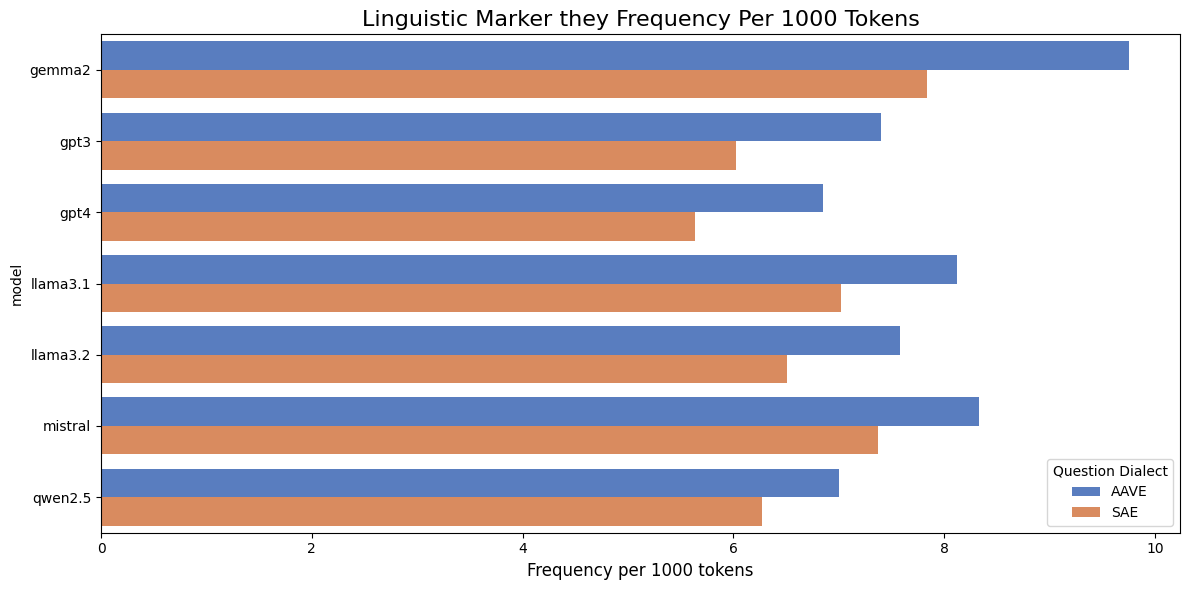

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#'you'
# "i"
# 'ppron'
#'social'
#'posemo'
#'tentat'
#'percept'
#'negemo'
# Group by 'model' and 'dialect' and extract a specific column, e.g., 'ppron'
marker = 'they'
plot_data = df_ling.pivot(index='model', columns='dialect', values=marker)

# Melt the pivoted DataFrame to long format for seaborn
df_long = plot_data.reset_index().melt(id_vars='model', var_name='Question Dialect', value_name='Frequency')

# Plot with seaborn
plt.figure(figsize=(12, 6))
ax = sns.barplot(
    data=df_long,
    x="Frequency",
    y="model",
    hue="Question Dialect",
    palette="muted"
)


plt.title(f'Linguistic Marker {marker} Frequency Per 1000 Tokens', fontsize=16)
plt.xlabel("Frequency per 1000 tokens", fontsize=12)

handles, labels = ax.get_legend_handles_labels()  # Get current handles and labels
new_labels = ['AAVE', 'SAE']  # Define the new labels
ax.legend(handles, new_labels, title='Question Dialect')


plt.tight_layout()
plt.savefig(f"liwc_{marker}.png", dpi=300, format='png', bbox_inches='tight')

# Show the plot
plt.show()


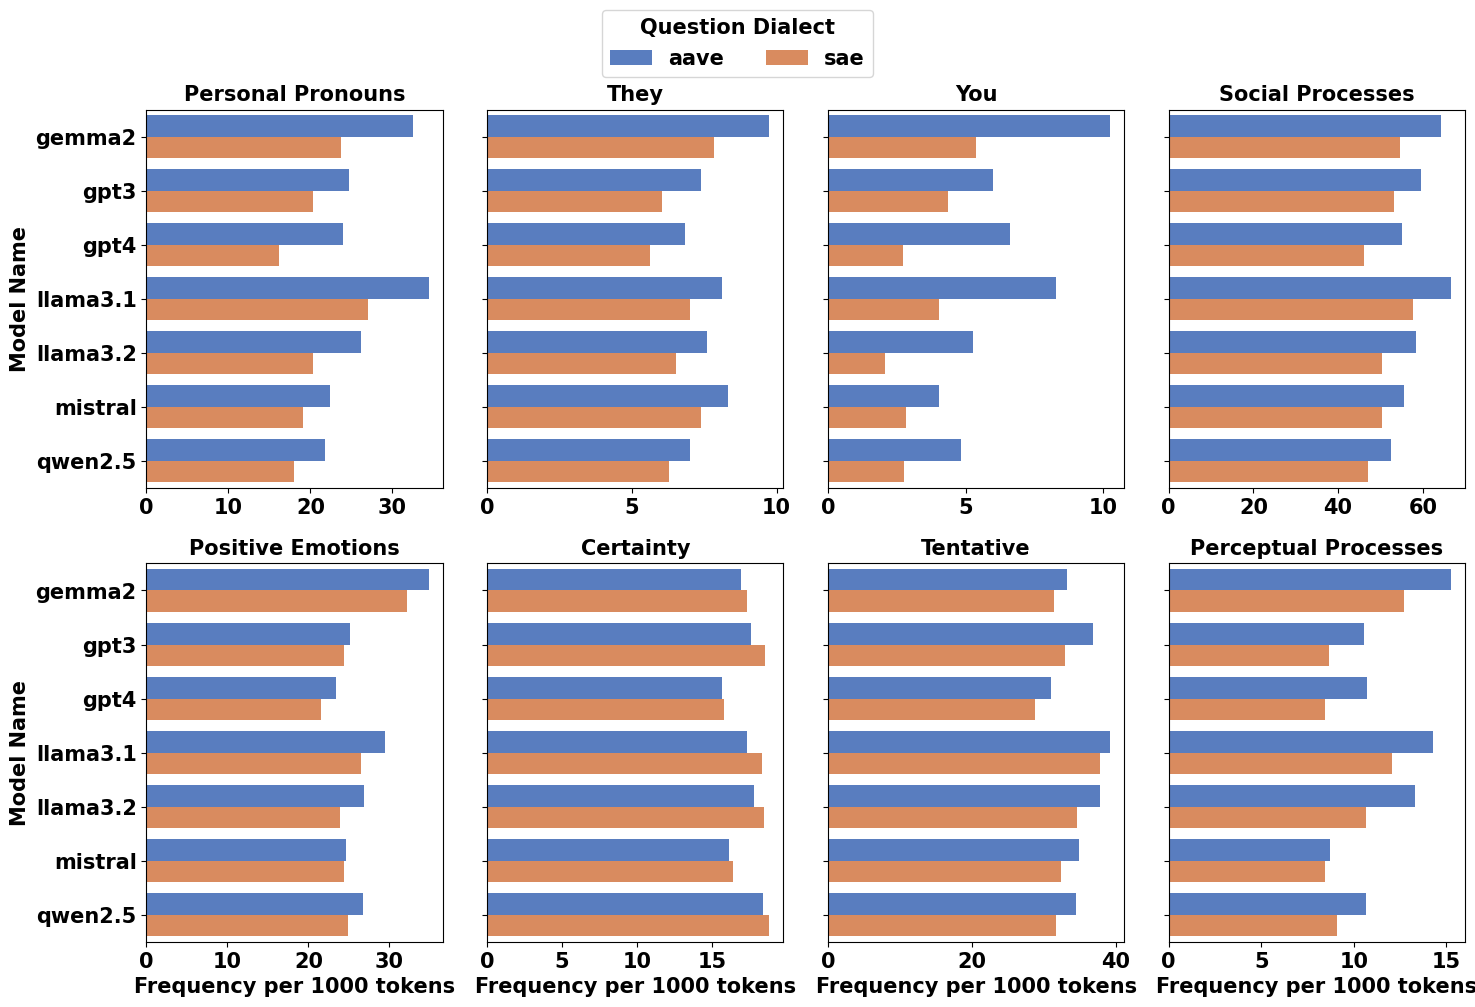

In [81]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.rc('font',  weight='bold', size=15)
plt.rc('axes', titlesize=15, labelsize=15)  # Bold axes titles and labels
plt.rc('legend', fontsize=15)  # Legend font size
plt.rc('xtick', labelsize=15)  # X-axis tick font size
plt.rc('ytick', labelsize=15)  # Y-axis tick font size

# Example linguistic markers (replace with your actual list of markers)
linguistic_markers = ['ppron','they', 'you', 'social', 'posemo', 'certain','tentat','percept']

marker_dic = {'ppron':'Personal Pronouns',
             'they': "They",
             'you': 'You',
             'social': 'Social Processes',
             'posemo': 'Positive Emotions',
             'certain': 'Certainty',
             'tentat':'Tentative',
             'percept':'Perceptual Processes'}

# Create a grid layout
n_rows = 2  # Number of rows in the grid
n_cols = 4  # Number of columns in the grid
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 10), sharex=False, sharey=True)  # Set sharex=False

# Flatten the axes for easier iteration
axes = axes.flatten()

# Loop through markers and create a horizontal bar plot in each grid cell
for i, marker in enumerate(linguistic_markers):
    if i < len(axes):  # Avoid index error if markers < grid cells
        # Prepare the data for the current marker
        plot_data = df_ling.pivot(index='model', columns='dialect', values=marker)
        df_long = plot_data.reset_index().melt(id_vars='model', var_name='Question Dialect', value_name='Frequency')
        
        # Plot the data in the respective subplot
        sns.barplot(
            data=df_long,
            x="Frequency",
            y="model",
            hue="Question Dialect",
            palette="muted",
            ax=axes[i],
            dodge=True,
        )
        # Customize the subplot
        if i>=4:
            axes[i].set_title(f"{marker_dic[marker]}",weight='bold')
            axes[i].set_xlabel("Frequency per 1000 tokens")
            axes[i].set_ylabel("Model Name")
        else:
            axes[i].set_title(f"{marker_dic[marker]}",weight='bold')
            axes[i].set_xlabel("")
            axes[i].set_ylabel("Model Name")
            

        # Remove legend from individual subplots
        axes[i].legend_.remove()
        

# Adjust the layout
plt.tight_layout()
plt.subplots_adjust(
    top=0.91,
    hspace=0.2,  # Reduce vertical spacing (smaller value decreases distance)
    wspace=0.15   # Reduce horizontal spacing (smaller value decreases distance)
)

# Create a single global legend outside the grid
handles, labels = axes[0].get_legend_handles_labels()  # Extract handles and labels from the first subplot
fig.legend(handles, labels, title="Question Dialect", loc='upper center', ncol=3, bbox_to_anchor=(0.5, 1.02))
plt.savefig('my_plot.pdf',bbox_inches='tight')
plt.show()



## Experiment 4: Uncertainty in the Answer Produced by LLMs.

with open("dataset_name.pkl", "rb") as f:
    dataset_names = pickle.load(f)
    
for i in range(10):
    df_regular = run_simulation(dataset_names = dataset_names, model_name = "gpt-3.5", aave= False, n_run = 1, aave_instruct = False, converter_type = "both")
    df_regular.to_csv(f'uncertainty_exp/sae_uncertainty_{i}.csv', header = True, index = False)

In [ ]:
from evaluate import load
import math
def create_uncertainty_df(model_name, df_uncertain):
    llm_model = model_name
    df = pd.read_csv(f'uncertainty_exp/{llm_model}/aave_uncertainty_0.csv')
    columns = df.columns
    sae_uncertainty_df = pd.DataFrame(columns = columns)
    aave_uncertainty_df = pd.DataFrame(columns = columns)
    
    with open("dataset_name.pkl", "rb") as f:
        dataset_names = pickle.load(f)
    
    for i in range(10):
        temp_df_sae = pd.read_csv(f'uncertainty_exp/{llm_model}/sae_uncertainty_{i}.csv')
        temp_df_aave = pd.read_csv(f'uncertainty_exp/{llm_model}/aave_uncertainty_{i}.csv')
        sae_uncertainty_df = pd.concat([sae_uncertainty_df, temp_df_sae], ignore_index=True)
        aave_uncertainty_df = pd.concat([aave_uncertainty_df, temp_df_aave], ignore_index=True)
    
    sae_uncertainty_df['letter_answer'] = sae_uncertainty_df['letter_answer'].str.replace(r'[()]', '', regex=True)
    aave_uncertainty_df['letter_answer'] = aave_uncertainty_df['letter_answer'].str.replace(r'[()]', '', regex=True)
    # acc_sae = extract_model_accuracy(sae_uncertainty_df)
    # acc_aave  = extract_model_accuracy(aave_uncertainty_df)
    entropy_lst_sae = []
    entropy_lst_aave = []
    correct_sae_lst = []
    correct_aave_lst = []
    for name in dataset_names:
        name = name.split('-')[1]
        try:
            
            subject_df_sae = sae_uncertainty_df[sae_uncertainty_df['subject']==name]
            sae_matches = (subject_df_sae['letter_answer'] == subject_df_sae['correct_answer'])
            sae_proportion = sae_matches.mean()
            correct_sae_lst.append(sae_proportion)
            entropy_sae = calculate_entropy(subject_df_sae['letter_answer'])
            entropy_lst_sae.append(entropy_sae)
            subject_df_aave = aave_uncertainty_df[aave_uncertainty_df['subject']==name]
            aave_matches = (subject_df_aave['letter_answer'] == subject_df_aave['correct_answer'])
            aave_proportion = aave_matches.mean()
            correct_aave_lst.append(aave_proportion)
            entropy_aave = calculate_entropy(subject_df_aave['letter_answer'])
            entropy_lst_aave.append(entropy_aave)
        except:
            continue
    
    bertscore = load("bertscore")
    bertscore_lst_f1_aave = []
    bertscore_lst_precision_aave = []
    bertscore_lst_recall_aave = []
    for name in dataset_names:
        name = name.split('-')[1]
        try:
            subject_df = aave_uncertainty_df[aave_uncertainty_df['subject']==name]
            unique_pairs = list(combinations(subject_df.index, 2))
            references = [subject_df.loc[i[0]]['answer'] for i in unique_pairs]
            predictions = [subject_df.loc[i[1]]['answer'] for i in unique_pairs]
            results = bertscore.compute(predictions=predictions, references=references, model_type="distilbert-base-uncased")
            bertscore_lst_f1_aave.append(sum(results['f1'])/len(results['f1']))
            bertscore_lst_precision_aave.append(sum(results['precision'])/len(results['precision']))
            bertscore_lst_recall_aave.append(sum(results['recall'])/len(results['recall']))
        except:
            continue
            
    bertscore_lst_f1_sae = []
    bertscore_lst_precision_sae = []
    bertscore_lst_recall_sae = []
    for name in dataset_names:
        name = name.split('-')[1]
        try:
            subject_df = sae_uncertainty_df[sae_uncertainty_df['subject']==name]
            unique_pairs = list(combinations(subject_df.index, 2))
            references = [subject_df.loc[i[0]]['answer'] for i in unique_pairs]
            predictions = [subject_df.loc[i[1]]['answer'] for i in unique_pairs]
            results = bertscore.compute(predictions=predictions, references=references, model_type="distilbert-base-uncased")
            bertscore_lst_f1_sae.append(sum(results['f1'])/len(results['f1']))
            bertscore_lst_precision_sae.append(sum(results['precision'])/len(results['precision']))
            bertscore_lst_recall_sae.append(sum(results['recall'])/len(results['recall']))
        except:
            continue

    correct_sae_lst = [x for x in correct_sae_lst if not math.isnan(x)]
    correct_aave_lst = [x for x in correct_aave_lst if not math.isnan(x)]
    print([model_name,"sae",(sum(entropy_lst_sae)/len(entropy_lst_sae)),(sum(bertscore_lst_f1_sae)/len(bertscore_lst_f1_sae)),(sum(bertscore_lst_precision_sae)/len(bertscore_lst_precision_sae)),(sum(bertscore_lst_recall_sae)/len(bertscore_lst_recall_sae)),(sum(correct_sae_lst)/len(correct_sae_lst))] )
    df_uncertain.loc[len(df_uncertain)] = [model_name,"sae",(sum(entropy_lst_sae)/len(entropy_lst_sae)),(sum(bertscore_lst_f1_sae)/len(bertscore_lst_f1_sae)),(sum(bertscore_lst_precision_sae)/len(bertscore_lst_precision_sae)),(sum(bertscore_lst_recall_sae)/len(bertscore_lst_recall_sae)),(sum(correct_sae_lst)/len(correct_sae_lst))]
    df_uncertain.loc[len(df_uncertain)] = [model_name,"aave",(sum(entropy_lst_aave)/len(entropy_lst_aave)),(sum(bertscore_lst_f1_aave)/len(bertscore_lst_f1_aave)),(sum(bertscore_lst_precision_aave)/len(bertscore_lst_precision_aave)),(sum(bertscore_lst_recall_aave)/len(bertscore_lst_recall_aave)),(sum(correct_aave_lst)/len(correct_aave_lst))]
    print(sum(entropy_lst_sae)/len(entropy_lst_sae))
    print(sum(entropy_lst_aave)/len(entropy_lst_aave))
    print(f"the final score f1 is: {sum(bertscore_lst_f1_aave)/len(bertscore_lst_f1_aave)}")
    print(f"the final score precision is: {sum(bertscore_lst_precision_aave)/len(bertscore_lst_precision_aave)}")
    print(f"the final score recall is: {sum(bertscore_lst_recall_aave)/len(bertscore_lst_recall_aave)}")
    print(f"the final score f1 is: {sum(bertscore_lst_f1_sae)/len(bertscore_lst_f1_sae)}")
    print(f"the final score precision is: {sum(bertscore_lst_precision_sae)/len(bertscore_lst_precision_sae)}")
    print(f"the final score recall is: {sum(bertscore_lst_recall_sae)/len(bertscore_lst_recall_sae)}")
    return df_uncertain

In [2]:
ling_df = pd.read_csv('linguistic_marker.csv')

In [3]:
ling_df 

,model,dialect,ppron,i,you,we,they,social,posemo,negemo,tentat,certain,percept
0,gpt3,sae,20.274755,1.812316,4.364309,6.260919,6.027004,53.242043,24.360895,12.131979,32.979932,18.540411,8.686471
1,gpt3,aave,24.720154,2.215846,6.008119,6.987354,7.399558,59.453840,25.122304,12.064497,36.891220,17.626230,10.568499
2,gpt4,sae,16.105875,0.616029,2.728548,5.184828,5.631425,46.008250,21.594310,11.945476,28.805472,15.818917,8.447137
3,gpt4,aave,23.978082,0.888688,6.629263,7.422873,6.845614,55.181119,23.346492,11.540331,31.084675,15.671372,10.698212
4,llama3.1,sae,26.976371,2.810486,4.046316,10.915251,7.016414,57.608893,26.491000,10.645497,37.784281,18.376900,12.044673
5,llama3.1,aave,34.407346,3.785347,8.297436,12.158041,8.117716,66.624358,29.436972,9.792480,39.239561,17.340709,14.278734
6,llama3.2,sae,20.309254,1.319671,2.085490,8.285891,6.512199,50.437406,23.873049,11.465409,34.620502,18.508211,10.661299
7,llama3.2,aave,26.166607,1.885467,5.277357,9.347904,7.585069,58.363086,26.839689,11.025733,37.785990,17.810907,13.301393
8,qwen2.5,sae,18.028662,1.781504,2.761265,5.166493,6.267571,46.965246,24.925232,11.357583,31.654333,18.844910,9.105318
9,qwen2.5,aave,21.759130,1.993102,4.842842,5.703440,7.004896,52.507019,26.744525,11.248487,34.433147,18.386696,10.667716


In [5]:
from scipy import stats
stats.ttest_ind(ling_df[ling_df['dialect'] == "sae"]['percept'], ling_df[ling_df['dialect'] == "aave"]['percept'])



TtestResult(statistic=-1.7116344897967966, pvalue=0.1126628790036697, df=12.0)

In [ ]:
df_uncertainty.to_csv('uncertainty.csv',header= True, index = False)

## Extra Experiment: Using Uncensored LLAMA3.1 8B 

In [ ]:
df_regular_llama31

In [ ]:
import pandas as pd
from tqdm import tqdm
from transformers import pipeline

# llama3.1 8b path
llama31_path = "mmlu_dataset/llama3.1/"

df_llm_llama31 = pd.read_csv(llama31_path + "aave_llm_mmlu_qna.csv")

pipe = pipeline("text-generation", model="mlabonne/Meta-Llama-3.1-8B-Instruct-abliterated", device=0)

from qna_simulation import answer_extractor
answer_lst = []
question_lst = []
subject_lst = []
pure_question_lst =[]
correct_answer_lst = []
for i in tqdm(range(2)):
    print(i)
    question = df_llm_llama31.loc[i]['question']
    question_lst.append(df_llm_llama31.loc[i]['question'])
    subject_lst.append(df_llm_llama31.loc[i]['subject'])
    pure_question_lst.append( df_llm_llama31.loc[i]['pure_question'])
    correct_answer_lst.append( df_llm_llama31.loc[i]['correct_answer'])
    messages = [
        {"role": "user", "content": f"Someone asked you a multiple choice question: {question}, Please first provide an detailed explaination then your final answer. You need to make your explaination sounds as natural and realistic as possible At the end, you should state the letter option (A, B, C, or D) you choose. You answer should strictly be less than 400 words."},
    ]
    try:    
        answer = pipe(messages)[0]['generated_text'][1]['content']
        answer_lst.append(answer)
    except:
        answer_lst.append("Answer is C")
letter_lst = answer_extractor(answer_lst).generate()

return_df = pd.DataFrame(data = {"subject":subject_lst, "question":question_lst, "answer":answer_lst, 
                                "letter_answer": letter_lst, "pure_question":pure_question_lst, "correct_answer":correct_answer_lst})

return_df.to_csv("uncensored_llama31_aave.csv", header = True, index = False)
print('job finished')

In [ ]:
from qna_simulation import answer_extractor
df_aave_uncensored = pd.read_csv('uncensored_llama31_aave.csv')

matches_aave_gpt4 = extract_model_accuracy(df_aave_uncensored)


print(matches_aave_gpt4)

In [ ]:
model_accuracy_df.to_csv('model_accuracy.csv', header = True, index= False)


In [ ]:
aave_flesh_score_gpt4 = get_readability_score(df_aave_uncensored)
grade_level_regular = np.array([categorize_score(score) for score in aave_flesh_score_gpt4])
print("sae answer grade level")
print(np.unique(grade_level_regular, return_counts=True))

In [ ]:
import seaborn as sns
df = pd.read_csv('readability_v1.csv')
data = {
        "Grade Level": ['5th grade','5th grade','5th grade','6th grade','6th grade','6th grade','7th grade','7th grade','7th grade','8th & 9th grade','8th & 9th grade','8th & 9th grade','10th to 12th grade','10th to 12th grade','10th to 12th grade','College','College','College','College Graduate','College Graduate','College Graduate','Professional','Professional','Professional'],
        "Question Dialect": ['SAE',"AAVE","AAVE_RAW",'SAE',"AAVE","AAVE_RAW",'SAE',"AAVE","AAVE_RAW",'SAE',"AAVE","AAVE_RAW",'SAE',"AAVE","AAVE_RAW",'SAE',"AAVE","AAVE_RAW",'SAE',"AAVE","AAVE_RAW",'SAE',"AAVE","AAVE_RAW",],
        "Frequency": [2,13,37,35,91,168,150,376,562,318,640,753,658,745,735,1210,837,574,349,52,37,9,4,3] # Notice one value is 0
    }
df = pd.DataFrame(data)

# Plot
plt.figure(figsize=(11, 6))
ax = sns.barplot(
    data=df,
    x="Grade Level",
    y="Frequency",
    hue="Question Dialect",
    palette="muted"
)

# Adding values on top of the bars
for p in ax.patches:
    if p.get_height() > 0:  # Only add text for bars with height > 0
        ax.annotate(
            f'{p.get_height():.0f}',  # Format the value as an integer
            (p.get_x() + p.get_width() / 2., p.get_height()),  # Position at bar center
            ha='center',  # Horizontal alignment
            va='center',  # Vertical alignment
            xytext=(0, 8),  # Offset text position by 8 points
            textcoords='offset points'
        )

# Adding labels
plt.title(f"Distribution Flesch-Kincaid Readability Grade Level Equivalent of the Explanations({'llama3.1'})", fontsize=16)
plt.xlabel("Grade Level", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.xticks(rotation = 25)
handles, labels = ax.get_legend_handles_labels()  # Get current handles and labels
new_labels = ['llama3.1/SAE', 'llama3.1/AAVE', 'llama3.1-uncensored/AAVE']  # Define the new labels
ax.legend(handles, new_labels, title='Answer Model/ Question Dialect')
# Show the plot
plt.savefig("flesch_kincaid_readability_grade_llama3.1_raw.png", dpi=300, format='png', bbox_inches='tight')
plt.tight_layout()
plt.show()

## Extra Data: Integrating Big Bench 

In [ ]:
df_big_bench = pd.read_csv('bigbench_hard.csv')
df_big_bench.head()

In [ ]:
df_big_bench['category'].unique()

In [ ]:
csv_80 = pd.read_csv('eight_categories_unique_sae_texts.csv')
csv_20 = pd.read_csv('additional_relationships_news_sae_texts.csv')
total_df = pd.concat([csv_80,csv_20],ignore_index = True)
total_df

In [ ]:
from aave_converter import aae_aavenue_method
from aave_converter import aae_rulebased_persona
import pandas as pd

In [ ]:
human_eval_sentences = pd.DataFrame(columns = ['original sae sentence','our conversion','AAVENUE conversion']) 
count = 0
for sen in list(total_df['Text']):
    count+=1
    print(count)
    human_eval_sentences.loc[len(human_eval_sentences)] =[sen,aae_rulebased_persona('gpt-3.5', sen),aae_aavenue_method('gpt-3.5', sen)]


In [ ]:
human_eval_sentences

In [ ]:
human_eval_sentences.to_csv('100_sample_conversions.csv',header = True, index = False)

In [ ]:
human_eval_sentences_sample = human_eval_sentences.sample(n=50).reset_index(drop = True)
human_eval_sentences_sample.to_csv('human_eval_sentences_sample.csv',index = True, )